In [2]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
import os
from shutil import copy
import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import imageio
from itertools import compress

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams.update({'figure.max_open_warning': 0})

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'legend.title_fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
#‘xx-small’, ‘x-small’, ‘small’, ‘medium’, ‘large’, ‘x-large’, ‘xx-large’
pylab.rcParams.update(params)
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from statsmodels.tsa.api import VAR

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree

import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df_date_temperature = pd.read_csv('data/FW_temperature_filled.csv')
df_date_temperature = df_date_temperature.dropna()
part_number_list = df_date_temperature['final_locus_population_id'].tolist()
unic_part_number_list = []
df_temperature_cleared = pd.DataFrame(columns = ['final_locus_population_id','event_date', 'temperature_cleared'])
for item in part_number_list:
    if item not in unic_part_number_list:
        unic_part_number_list.append(item)
n = 0
while n < len(unic_part_number_list):
    part_number = unic_part_number_list[n]
    df_temperature_filtered = df_date_temperature[(df_date_temperature['final_locus_population_id'] == part_number)]
    df_temperature_filtered.reset_index(drop = True, inplace = True)
    #df_temperanure_filtered = df_temperature_filtered.reindex(columns = df_temperature_filtered.columns.tolist()+['rolling_tempr','tempr_cleared'])
    df_temperature_filtered['rolling_tempr'] = df_temperature_filtered['temperature'].rolling(30).mean()
    df_temporary = df_temperature_filtered.head(30)
    average_tempr_30 = df_temporary['temperature'].mean()
    half_average_tempr_30 = average_tempr_30 / 2 
    k = 0
    while k < len(df_temporary):
        t_1 = df_temperature_filtered.at[k,'temperature']
        t_dif = t_1 - average_tempr_30
        if abs(t_dif) < half_average_tempr_30:
                df_temperature_filtered.at[k,'rolling_tempr'] = t_1
        else:
                df_temperature_filtered.at[k,'rolling_tempr'] = average_tempr_30
        k = k + 1        
    df_temperature_cleared = df_temperature_cleared.append(df_temperature_filtered)    
    n = n + 1
    print ('n', n)
#datatypes_1 = df_temperature_cleared.dtypes
m = 0
cc = len(df_temperature_cleared)
for m in range (cc):
    t_2 = df_temperature_cleared.iloc[m]['temperature']
    t_rolling_aver = df_temperature_cleared.iloc[m]['rolling_tempr']
    half_t_rolling_aver = t_rolling_aver / 2
    t_dif_clear = t_2 - t_rolling_aver
    if abs(t_dif_clear) < half_t_rolling_aver:
        df_temperature_cleared.at[m,'temperature_cleared'] = t_2
    else:
        df_temperature_cleared.at[m,'temperature_cleared'] = t_rolling_aver
    m = m + 1
    print ('m', m)    
   

FileNotFoundError: ignored

In [ ]:
import numpy as np

In [ ]:
dataset=pd.read_csv("dataset.csv", delimiter=';') #smolt_dataset.csv in data folder

In [ ]:
dataset

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,days_btw_transfer_conf,SGR,TGC,order_of_creation_from,strain,year_class,number_of_prod_cycle,place_first_feeding,specific_treatment,two_place_of_first_feeding
0,3046036,11,2017,1,1_2017,winter,44934.17500,0.007496,0.001309,0.006187,...,NaN,NaN,NaN,6,FAN,16,C1,PH,None,0
1,3046036,1052,2019,1,1_2019,winter,46388.23077,0.003943,0.000925,0.003018,...,56.0,0.863440,0.951440,5,FLY,18,C1B,PH,None,0
2,3046036,3918,2020,11,11_2020,autumn,45241.16667,0.007676,0.005641,0.002035,...,49.0,0.972985,1.181746,11,FLY,19,C4,PH,LUF,0
3,3046043,310,2017,6,6_2017,summer,38451.42593,0.018394,0.006843,0.011551,...,NaN,NaN,NaN,10,FLY,16,C2B,PH,None,0
4,3046043,498,2019,7,7_2019,summer,41131.79661,0.027014,0.022783,0.004231,...,93.0,0.800973,0.883693,3,LCY,18,C3,PGR,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,7183889,6071,2022,6,6_2022,summer,44747.76389,0.012813,0.002759,0.010054,...,77.0,0.692506,0.768343,3,FLY,21,C2,PH,LUF,0
1087,7183890,6072,2022,6,6_2022,summer,44563.77612,0.014813,0.008026,0.006787,...,66.0,0.862384,0.958244,3,FLY,21,C2,PH,LUF,0
1088,7183891,6072,2022,6,6_2022,summer,44585.79167,0.014654,0.007420,0.007234,...,64.0,0.695116,0.801180,3,FLY,21,C2,PH,LUF,0
1089,7183892,6069,2022,6,6_2022,summer,44244.95833,0.022576,0.015284,0.007292,...,73.0,0.792405,0.876280,3,FLY,21,C2,PH,LUF,0


In [ ]:
df_int=pd.read_csv("integral.csv",delimiter=';')

In [ ]:
#integral collected via sql 
#

#SELECT [final_locus_population_id], [shipout_date], round(SUM(s.[temperature_cleared1]),0) AS Totaltemp
#FROM  [salmon].[dbo].[FW_cycle_dates] e
#INNER JOIN [salmon].[dbo].[temp] s ON e.[pretransfer_fw_locus_population_id] = s.[final_locus_population_id]
#WHERE s.[event_date] BETWEEN e.[first_feeding_date] AND e.[shipout_date]
#GROUP BY [final_locus_population_id], e.shipout_date;


In [ ]:
df_int[df_int.final_locus_population_id.isin([194650512,194650513,194650515,194650516,194650523])]

,final_locus_population_id,shipout_date,Totaltemp
255,194650523,01.03.2023,4422
856,194650512,01.03.2023,4422
1124,194650516,01.03.2023,4422
1743,194650515,01.03.2023,4422
2826,194650513,01.03.2023,4422


In [ ]:
merged_df = dataset.merge(df_int, left_on=['from_locus_population_id', 'transfer_date'],
                          right_on=['final_locus_population_id', 'shipout_date'],
                          how='left')

In [ ]:
merged_df['Totaltemp'] = merged_df['Totaltemp'].fillna(0)  
merged_df = merged_df.dropna(subset=['final_locus_population_id'])

In [ ]:
dataset = merged_df

In [ ]:
dataset

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,order_of_creation_from,strain,year_class,number_of_prod_cycle,place_first_feeding,specific_treatment,two_place_of_first_feeding,final_locus_population_id,shipout_date,Totaltemp
1,3046036,1052,2019,1,1_2019,winter,46388.23077,0.003943,0.000925,0.003018,...,5,FLY,18,C1B,PH,None,0,36789724.0,15.01.2019,3325.0
2,3046036,3918,2020,11,11_2020,autumn,45241.16667,0.007676,0.005641,0.002035,...,11,FLY,19,C4,PH,LUF,0,193351849.0,18.11.2020,3600.0
6,3046052,847,2019,7,7_2019,summer,41498.96364,0.018027,0.015206,0.002821,...,3,FLY,18,C3,PGR,None,1,36792900.0,15.07.2019,3737.0
8,3046064,5736,2021,6,6_2021,summer,80084.20513,0.018263,0.005270,0.012994,...,1,FLY,20,C2B,PH,None,0,194359029.0,03.06.2021,3686.0
10,3046100,690,2018,9,9_2018,autumn,40280.97403,0.009344,0.004573,0.004771,...,2,LCY,17,C3B,PH,None,0,36786363.0,12.09.2018,3797.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,7183889,6071,2022,6,6_2022,summer,44747.76389,0.012813,0.002759,0.010054,...,3,FLY,21,C2,PH,LUF,0,194514863.0,24.06.2022,4275.0
1087,7183890,6072,2022,6,6_2022,summer,44563.77612,0.014813,0.008026,0.006787,...,3,FLY,21,C2,PH,LUF,0,194506862.0,09.06.2022,4158.0
1088,7183891,6072,2022,6,6_2022,summer,44585.79167,0.014654,0.007420,0.007234,...,3,FLY,21,C2,PH,LUF,0,194511975.0,09.06.2022,4192.0
1089,7183892,6069,2022,6,6_2022,summer,44244.95833,0.022576,0.015284,0.007292,...,3,FLY,21,C2,PH,LUF,0,194506882.0,06.06.2022,4109.0


In [ ]:
df_date_temperature = pd.read_csv('FW_temperature_cleared.csv') #you can use dataframe from the node above
df_date_cycles = pd.read_csv('FW_cycle_dates.csv') #file is in data folder
datatypes_1 = df_date_temperature.dtypes
datatypes_2 = df_date_cycles.dtypes
df_date_temperature = df_date_temperature.dropna()
df_date_temperature ['event_date']= pd.to_datetime(df_date_temperature ['event_date'])
df_date_cycles [['first_movement_date', 'first_feeding_date', 'shipout_date']] = df_date_cycles [['first_movement_date', 'first_feeding_date', 'shipout_date']].apply(pd.to_datetime)
df_date_cycles = df_date_cycles.reindex(columns = df_date_cycles.columns.tolist()+['days_in_fresh_water','average_tempr','median_tempr', 'average_tempr_14_bfr_ship', 'strain', 'season'])
n = 0
while n < len(df_date_cycles):
    df_date_cycles.at[n, 'days_in_fresh_water'] = int((df_date_cycles.at[n, 'shipout_date'] - df_date_cycles.at[n, 'first_movement_date'])/np.timedelta64(1, 'D'))
    part_number = df_date_cycles.at[n, 'pretransfer_fw_locus_population_id']
    date_start_feeding = df_date_cycles.at[n, 'first_feeding_date']
    date_shipout = df_date_cycles.at[n, 'shipout_date']
    date_14d_bfr_shipout = date_shipout - np.timedelta64(14, 'D')
    filtered_df = df_date_temperature[(df_date_temperature['event_date']>= date_start_feeding) & (df_date_temperature['event_date'] <= date_shipout) & (df_date_temperature['final_locus_population_id']== part_number)]
    filtered_df_14 = df_date_temperature[(df_date_temperature['event_date']> date_14d_bfr_shipout) & (df_date_temperature['event_date'] <= date_shipout) & (df_date_temperature['final_locus_population_id']== part_number)]
    df_date_cycles.at[n, 'average_tempr'] = filtered_df['temperature_cleared'].mean()
    df_date_cycles.at[n, 'median_tempr'] = filtered_df['temperature_cleared'].median()
    df_date_cycles.at[n, 'average_tempr_14_bfr_ship'] = filtered_df_14['temperature_cleared'].mean()
    #filtered_df_2 = df_strain_season[(df_strain_season['from_locus_population_id'] == part_number)]
    #strain = filtered_df_2['strain']
    #print(filtered_df_2)
    n = n + 1
    print (n, date_start_feeding, date_shipout, part_number)

#df_date_cycles.to_excel(writer)
#writer.save()

 

1 2006-11-27 00:00:00 2007-04-13 00:00:00 36687326
2 2006-11-27 00:00:00 2007-03-28 00:00:00 36687382
3 2006-11-27 00:00:00 2007-04-11 00:00:00 36687957
4 2006-11-27 00:00:00 2007-04-19 00:00:00 36688302
5 2006-11-27 00:00:00 2007-04-23 00:00:00 36688439
6 2006-11-27 00:00:00 2007-04-24 00:00:00 36688556
7 2006-11-27 00:00:00 2007-05-25 00:00:00 36689617
8 2006-11-27 00:00:00 2007-05-23 00:00:00 36689631
9 2006-11-27 00:00:00 2007-05-25 00:00:00 36689635
10 2007-04-18 00:00:00 2007-07-10 00:00:00 36690523
11 2007-04-18 00:00:00 2007-07-19 00:00:00 36690760
12 2007-04-18 00:00:00 2007-07-25 00:00:00 36690914
13 2007-04-18 00:00:00 2007-07-11 00:00:00 36690926
14 2007-03-26 00:00:00 2007-07-17 00:00:00 36691090
15 2007-03-26 00:00:00 2007-07-23 00:00:00 36691113
16 2007-04-07 00:00:00 2007-08-03 00:00:00 36691238
17 2007-04-21 00:00:00 2007-08-07 00:00:00 36691320
18 2007-04-21 00:00:00 2007-08-20 00:00:00 36691591
19 2007-03-26 00:00:00 2007-08-14 00:00:00 36691747
20 2007-03-26 00:00:0

165 2007-11-30 00:00:00 2008-07-24 00:00:00 36712071
166 2007-11-30 00:00:00 2008-07-31 00:00:00 36712126
167 2007-11-22 00:00:00 2008-08-04 00:00:00 36712201
168 2007-11-22 00:00:00 2008-07-29 00:00:00 36712349
169 2007-11-22 00:00:00 2008-08-19 00:00:00 36713032
170 2007-11-22 00:00:00 2008-08-20 00:00:00 36713070
171 2007-11-22 00:00:00 2008-08-21 00:00:00 36713105
172 2008-02-19 00:00:00 2008-10-22 00:00:00 36714157
173 2008-02-19 00:00:00 2008-10-25 00:00:00 36714195
174 2008-02-19 00:00:00 2008-10-23 00:00:00 36714210
175 2008-02-19 00:00:00 2008-11-04 00:00:00 36714234
176 2008-02-19 00:00:00 2008-10-27 00:00:00 36714309
177 2008-02-19 00:00:00 2008-11-06 00:00:00 36714329
178 2008-02-19 00:00:00 2008-11-17 00:00:00 36714516
179 2008-02-19 00:00:00 2008-11-11 00:00:00 36714539
180 2008-02-19 00:00:00 2008-11-14 00:00:00 36714657
181 2008-02-19 00:00:00 2008-11-08 00:00:00 36714961
182 2008-02-19 00:00:00 2008-10-23 00:00:00 36715037
183 2008-02-19 00:00:00 2008-10-24 00:00:00 36

326 2010-01-08 00:00:00 2010-11-05 00:00:00 36726676
327 2010-01-16 00:00:00 2010-11-10 00:00:00 36726855
328 2010-01-16 00:00:00 2010-11-19 00:00:00 36726862
329 2010-01-16 00:00:00 2010-11-11 00:00:00 36726899
330 2010-01-16 00:00:00 2010-11-13 00:00:00 36726903
331 2010-01-16 00:00:00 2010-11-15 00:00:00 36726930
332 2010-01-16 00:00:00 2010-11-16 00:00:00 36727010
333 2010-01-16 00:00:00 2010-11-19 00:00:00 36727018
334 2010-01-16 00:00:00 2010-11-23 00:00:00 36727080
335 2010-08-26 00:00:00 2011-03-23 00:00:00 36727763
336 2010-08-26 00:00:00 2011-03-22 00:00:00 36727771
337 2010-08-26 00:00:00 2011-03-23 00:00:00 36727813
338 2010-08-26 00:00:00 2011-03-26 00:00:00 36727983
339 2010-08-26 00:00:00 2011-03-26 00:00:00 36727984
340 2010-08-26 00:00:00 2011-03-29 00:00:00 36727993
341 2010-08-26 00:00:00 2011-04-01 00:00:00 36728019
342 2010-08-27 00:00:00 2011-04-04 00:00:00 36728070
343 2010-08-27 00:00:00 2011-04-07 00:00:00 36728092
344 2010-08-27 00:00:00 2011-04-04 00:00:00 36

481 2010-09-15 00:00:00 2011-10-16 00:00:00 36734023
482 2011-02-08 00:00:00 2011-12-15 00:00:00 36734094
483 2011-02-08 00:00:00 2011-12-17 00:00:00 36734213
484 2011-02-08 00:00:00 2011-12-14 00:00:00 36734305
485 2011-02-08 00:00:00 2011-12-29 00:00:00 36734363
486 2011-02-08 00:00:00 2011-12-26 00:00:00 36734372
487 2010-09-15 00:00:00 2011-11-15 00:00:00 36734494
488 2010-09-15 00:00:00 2011-10-31 00:00:00 36734500
489 2011-02-11 00:00:00 2011-12-18 00:00:00 36734564
490 2011-02-11 00:00:00 2012-01-02 00:00:00 36734608
491 2011-02-12 00:00:00 2012-01-07 00:00:00 36734654
492 2010-09-15 00:00:00 2011-11-16 00:00:00 36734792
493 2010-09-15 00:00:00 2011-11-18 00:00:00 36734835
494 2010-09-15 00:00:00 2011-11-19 00:00:00 36734895
495 2010-09-15 00:00:00 2011-11-21 00:00:00 36734937
496 2010-09-15 00:00:00 2011-11-22 00:00:00 36734943
497 2010-09-15 00:00:00 2011-11-25 00:00:00 36735001
498 2010-09-15 00:00:00 2011-11-27 00:00:00 36735069
499 2010-09-15 00:00:00 2011-11-28 00:00:00 36

637 2011-11-16 00:00:00 2012-09-21 00:00:00 36741152
638 2011-11-16 00:00:00 2012-09-22 00:00:00 36741173
639 2011-11-16 00:00:00 2012-09-21 00:00:00 36741196
640 2011-11-16 00:00:00 2012-09-24 00:00:00 36741198
641 2012-02-28 00:00:00 2012-11-12 00:00:00 36741210
642 2012-02-28 00:00:00 2012-11-13 00:00:00 36741220
643 2011-11-16 00:00:00 2012-09-25 00:00:00 36741237
644 2011-11-16 00:00:00 2012-09-25 00:00:00 36741276
645 2011-11-16 00:00:00 2012-09-27 00:00:00 36741287
646 2012-02-28 00:00:00 2012-11-12 00:00:00 36741313
647 2012-02-28 00:00:00 2012-11-16 00:00:00 36741314
648 2012-02-28 00:00:00 2012-11-17 00:00:00 36741315
649 2012-02-26 00:00:00 2012-11-21 00:00:00 36741340
650 2012-02-26 00:00:00 2012-11-22 00:00:00 36741352
651 2012-02-26 00:00:00 2012-11-21 00:00:00 36741365
652 2012-02-26 00:00:00 2012-11-20 00:00:00 36741460
653 2012-02-26 00:00:00 2012-11-18 00:00:00 36741489
654 2012-02-26 00:00:00 2012-11-18 00:00:00 36741494
655 2012-02-26 00:00:00 2012-11-23 00:00:00 36

795 2012-11-14 00:00:00 2013-09-05 00:00:00 36748521
796 2012-11-14 00:00:00 2013-09-12 00:00:00 36748525
797 2012-11-14 00:00:00 2013-07-31 00:00:00 36748534
798 2012-11-14 00:00:00 2013-09-22 00:00:00 36748552
799 2012-11-14 00:00:00 2013-09-06 00:00:00 36748562
800 2012-11-14 00:00:00 2013-09-16 00:00:00 36748567
801 2012-11-14 00:00:00 2013-08-01 00:00:00 36748591
802 2012-11-14 00:00:00 2013-09-13 00:00:00 36748592
803 2012-11-14 00:00:00 2013-09-14 00:00:00 36748605
804 2012-11-14 00:00:00 2013-09-13 00:00:00 36748612
805 2012-11-14 00:00:00 2013-09-14 00:00:00 36748615
806 2012-11-14 00:00:00 2013-08-02 00:00:00 36748638
807 2012-11-14 00:00:00 2013-08-05 00:00:00 36748647
808 2012-11-14 00:00:00 2013-08-06 00:00:00 36748685
809 2012-11-14 00:00:00 2013-08-07 00:00:00 36748725
810 2012-11-14 00:00:00 2013-08-08 00:00:00 36748748
811 2012-11-14 00:00:00 2013-08-07 00:00:00 36748753
812 2012-11-14 00:00:00 2013-09-03 00:00:00 36749258
813 2012-11-14 00:00:00 2013-09-02 00:00:00 36

955 2013-11-23 00:00:00 2014-07-22 00:00:00 36756663
956 2013-11-23 00:00:00 2014-08-20 00:00:00 36756677
957 2013-11-23 00:00:00 2014-08-25 00:00:00 36756691
958 2013-11-23 00:00:00 2014-07-24 00:00:00 36756698
959 2013-11-23 00:00:00 2014-07-28 00:00:00 36756739
960 2013-11-23 00:00:00 2014-07-24 00:00:00 36756756
961 2013-11-23 00:00:00 2014-09-09 00:00:00 36756805
962 2013-11-23 00:00:00 2014-09-11 00:00:00 36756811
963 2013-11-23 00:00:00 2014-07-30 00:00:00 36756818
964 2013-11-23 00:00:00 2014-07-30 00:00:00 36756871
965 2013-11-23 00:00:00 2014-09-12 00:00:00 36756882
966 2013-11-23 00:00:00 2014-09-15 00:00:00 36757011
967 2013-11-23 00:00:00 2014-09-15 00:00:00 36757186
968 2013-11-23 00:00:00 2014-09-22 00:00:00 36757230
969 2013-11-23 00:00:00 2014-09-29 00:00:00 36757306
970 2013-11-23 00:00:00 2014-09-24 00:00:00 36757327
971 2013-11-23 00:00:00 2014-10-01 00:00:00 36757382
972 2013-11-23 00:00:00 2014-09-29 00:00:00 36757385
973 2013-11-23 00:00:00 2014-10-06 00:00:00 36

1110 2014-05-20 00:00:00 2015-02-23 00:00:00 36761678
1111 2014-05-20 00:00:00 2015-02-20 00:00:00 36761685
1112 2014-05-20 00:00:00 2015-02-24 00:00:00 36761705
1113 2014-08-19 00:00:00 2015-04-19 00:00:00 36761736
1114 2014-05-20 00:00:00 2015-02-27 00:00:00 36761767
1115 2014-05-20 00:00:00 2015-02-28 00:00:00 36761840
1116 2014-05-20 00:00:00 2015-03-04 00:00:00 36761881
1117 2014-05-20 00:00:00 2015-03-07 00:00:00 36761957
1118 2014-08-19 00:00:00 2015-04-22 00:00:00 36762045
1119 2014-05-20 00:00:00 2015-03-11 00:00:00 36762063
1120 2014-08-19 00:00:00 2015-04-28 00:00:00 36762215
1121 2014-05-20 00:00:00 2015-03-12 00:00:00 36762273
1122 2014-05-20 00:00:00 2015-03-13 00:00:00 36762287
1123 2014-05-20 00:00:00 2015-03-12 00:00:00 36762295
1124 2014-05-20 00:00:00 2015-03-23 00:00:00 36762330
1125 2014-11-11 00:00:00 2015-05-08 00:00:00 36762578
1126 2014-08-19 00:00:00 2015-04-21 00:00:00 36762591
1127 2014-11-11 00:00:00 2015-05-11 00:00:00 36762759
1128 2014-11-11 00:00:00 201

1266 2016-04-26 00:00:00 2016-12-26 00:00:00 36774257
1267 2016-06-01 00:00:00 2017-01-24 00:00:00 36774259
1268 2016-06-01 00:00:00 2017-02-02 00:00:00 36774275
1269 2016-04-27 00:00:00 2016-12-26 00:00:00 36774337
1270 2016-06-01 00:00:00 2017-02-17 00:00:00 36774368
1271 2016-04-26 00:00:00 2016-12-28 00:00:00 36774380
1272 2016-04-27 00:00:00 2017-01-04 00:00:00 36774394
1273 2016-06-01 00:00:00 2017-02-20 00:00:00 36774403
1274 2016-06-01 00:00:00 2017-02-09 00:00:00 36774405
1275 2016-06-01 00:00:00 2017-02-22 00:00:00 36774504
1276 2016-06-01 00:00:00 2017-04-01 00:00:00 36774694
1277 2016-04-26 00:00:00 2016-12-28 00:00:00 36774698
1278 2016-06-01 00:00:00 2017-04-01 00:00:00 36774716
1279 2016-04-27 00:00:00 2016-12-28 00:00:00 36774723
1280 2016-06-01 00:00:00 2017-02-15 00:00:00 36774724
1281 2016-04-26 00:00:00 2017-01-03 00:00:00 36774759
1282 2016-04-26 00:00:00 2017-01-04 00:00:00 36774788
1283 2016-04-27 00:00:00 2017-01-06 00:00:00 36774818
1284 2016-04-26 00:00:00 201

1418 2017-03-20 00:00:00 2017-12-14 00:00:00 36781433
1419 2017-03-20 00:00:00 2017-12-11 00:00:00 36781454
1420 2017-03-20 00:00:00 2017-12-21 00:00:00 36781566
1421 2017-03-20 00:00:00 2017-12-23 00:00:00 36781570
1422 2017-03-20 00:00:00 2017-12-15 00:00:00 36781580
1423 2017-03-18 00:00:00 2017-12-07 00:00:00 36781621
1424 2017-03-18 00:00:00 2017-12-04 00:00:00 36781628
1425 2017-03-18 00:00:00 2017-11-07 00:00:00 36781629
1426 2017-03-18 00:00:00 2017-11-08 00:00:00 36781640
1427 2017-03-18 00:00:00 2017-11-13 00:00:00 36781675
1428 2017-03-20 00:00:00 2017-12-18 00:00:00 36781729
1429 2017-04-25 00:00:00 2018-01-12 00:00:00 36781739
1430 2017-04-25 00:00:00 2018-01-09 00:00:00 36781758
1431 2017-03-18 00:00:00 2017-11-14 00:00:00 36781790
1432 2017-03-20 00:00:00 2017-12-22 00:00:00 36781877
1433 2017-03-20 00:00:00 2017-12-29 00:00:00 36782008
1434 2017-04-25 00:00:00 2018-02-12 00:00:00 36782033
1435 2017-04-25 00:00:00 2018-02-12 00:00:00 36782034
1436 2017-04-25 00:00:00 201

1576 2018-01-18 00:00:00 2018-10-16 00:00:00 36786950
1577 2018-01-18 00:00:00 2018-10-10 00:00:00 36786953
1578 2017-12-07 00:00:00 2018-08-23 00:00:00 36787185
1579 2018-01-18 00:00:00 2018-10-08 00:00:00 36787193
1580 2018-01-18 00:00:00 2018-10-18 00:00:00 36787196
1581 2017-12-07 00:00:00 2018-08-21 00:00:00 36787205
1582 2017-12-07 00:00:00 2018-08-22 00:00:00 36787272
1583 2017-12-07 00:00:00 2018-08-27 00:00:00 36787326
1584 2018-01-18 00:00:00 2018-11-09 00:00:00 36787336
1585 2018-01-18 00:00:00 2018-11-07 00:00:00 36787395
1586 2017-12-07 00:00:00 2018-08-29 00:00:00 36787414
1587 2017-12-07 00:00:00 2018-08-31 00:00:00 36787454
1588 2018-01-18 00:00:00 2018-11-07 00:00:00 36787518
1589 2018-01-18 00:00:00 2018-11-06 00:00:00 36787545
1590 2018-01-18 00:00:00 2018-11-06 00:00:00 36787564
1591 2018-03-20 00:00:00 2018-11-12 00:00:00 36787612
1592 2018-03-20 00:00:00 2018-11-14 00:00:00 36787653
1593 2018-03-20 00:00:00 2018-11-12 00:00:00 36787662
1594 2018-01-18 00:00:00 201

1736 2018-12-19 00:00:00 2019-09-24 00:00:00 36794048
1737 2018-10-25 00:00:00 2019-10-02 00:00:00 36794058
1738 2018-12-18 00:00:00 2019-09-30 00:00:00 36794059
1739 2018-12-18 00:00:00 2019-10-08 00:00:00 36794062
1740 2018-12-18 00:00:00 2019-10-10 00:00:00 36794066
1741 2018-12-19 00:00:00 2019-09-27 00:00:00 36794095
1742 2018-12-18 00:00:00 2019-11-07 00:00:00 36794298
1743 2018-10-25 00:00:00 2019-09-02 00:00:00 36794406
1744 2018-10-25 00:00:00 2019-09-02 00:00:00 36794443
1745 2018-10-25 00:00:00 2019-07-18 00:00:00 36794498
1746 2018-08-21 00:00:00 2019-07-19 00:00:00 36794572
1747 2018-10-25 00:00:00 2019-07-23 00:00:00 36794625
1748 2018-10-25 00:00:00 2019-07-24 00:00:00 36794645
1749 2018-10-25 00:00:00 2019-07-26 00:00:00 36794691
1750 2018-10-25 00:00:00 2019-07-29 00:00:00 36794716
1751 2018-10-25 00:00:00 2019-09-04 00:00:00 36794892
1752 2018-10-25 00:00:00 2019-09-23 00:00:00 36794895
1753 2018-10-25 00:00:00 2019-09-04 00:00:00 36794901
1754 2019-02-27 00:00:00 201

1896 2019-04-08 00:00:00 2020-02-27 00:00:00 38194798
1897 2019-04-08 00:00:00 2020-02-28 00:00:00 38194804
1898 2019-04-08 00:00:00 2020-02-29 00:00:00 38194809
1899 2019-02-27 00:00:00 2020-03-02 00:00:00 38194838
1900 2019-04-08 00:00:00 2020-03-03 00:00:00 38194870
1901 2019-04-08 00:00:00 2020-03-02 00:00:00 38194876
1902 2019-08-31 00:00:00 2020-05-26 00:00:00 38194886
1903 2019-04-08 00:00:00 2020-03-03 00:00:00 38194887
1904 2019-04-08 00:00:00 2020-03-05 00:00:00 38194890
1905 2019-04-08 00:00:00 2020-03-05 00:00:00 38194917
1906 2019-04-08 00:00:00 2020-03-06 00:00:00 38194956
1907 2019-04-08 00:00:00 2020-03-06 00:00:00 38194969
1908 2019-06-15 00:00:00 2020-03-09 00:00:00 38195012
1909 2019-06-15 00:00:00 2020-03-10 00:00:00 38195024
1910 2019-06-15 00:00:00 2020-03-10 00:00:00 38195033
1911 2019-06-15 00:00:00 2020-03-11 00:00:00 38195039
1912 2019-06-15 00:00:00 2020-03-10 00:00:00 38195045
1913 2019-06-15 00:00:00 2020-03-12 00:00:00 38195055
1914 2019-06-15 00:00:00 202

2053 2020-01-11 00:00:00 2020-09-17 00:00:00 193252533
2054 2020-01-11 00:00:00 2020-09-17 00:00:00 193252550
2055 2006-11-27 00:00:00 2007-03-20 00:00:00 193306707
2056 2006-11-27 00:00:00 2007-03-23 00:00:00 193306799
2057 2006-11-27 00:00:00 2007-04-14 00:00:00 193307358
2058 2006-11-27 00:00:00 2007-04-18 00:00:00 193307446
2059 2006-11-27 00:00:00 2007-04-20 00:00:00 193307493
2060 2006-11-27 00:00:00 2007-04-25 00:00:00 193307577
2061 2007-11-22 00:00:00 2008-07-07 00:00:00 193316035
2062 2007-11-30 00:00:00 2008-07-18 00:00:00 193316203
2063 2007-11-30 00:00:00 2008-07-18 00:00:00 193316204
2064 2007-11-30 00:00:00 2008-07-19 00:00:00 193316212
2065 2007-11-22 00:00:00 2008-07-25 00:00:00 193316319
2066 2007-11-22 00:00:00 2008-07-28 00:00:00 193316385
2067 2008-02-19 00:00:00 2008-11-18 00:00:00 193317984
2068 2008-02-19 00:00:00 2008-11-18 00:00:00 193317985
2069 2009-03-02 00:00:00 2009-07-10 00:00:00 193318998
2070 2009-02-20 00:00:00 2009-07-23 00:00:00 193319081
2071 2009-

2211 2014-02-08 00:00:00 2014-10-27 00:00:00 193334177
2212 2014-02-08 00:00:00 2014-10-29 00:00:00 193334187
2213 2014-02-08 00:00:00 2014-11-14 00:00:00 193334233
2214 2014-03-07 00:00:00 2014-11-28 00:00:00 193334305
2215 2014-03-17 00:00:00 2014-12-11 00:00:00 193334342
2216 2014-05-20 00:00:00 2015-01-20 00:00:00 193334536
2217 2014-08-20 00:00:00 2015-05-06 00:00:00 193336505
2218 2014-11-11 00:00:00 2015-05-11 00:00:00 193336521
2219 2016-04-27 00:00:00 2016-12-26 00:00:00 193338770
2220 2016-04-26 00:00:00 2017-01-06 00:00:00 193338799
2221 2016-06-01 00:00:00 2017-02-02 00:00:00 193338859
2222 2016-06-01 00:00:00 2017-02-02 00:00:00 193338860
2223 2016-11-19 00:00:00 2017-08-02 00:00:00 193339997
2224 2018-05-22 00:00:00 2019-01-28 00:00:00 193341756
2225 2018-08-21 00:00:00 2019-04-24 00:00:00 193342095
2226 2018-10-25 00:00:00 2019-09-04 00:00:00 193342557
2227 2019-02-27 00:00:00 2019-12-03 00:00:00 193342956
2228 2019-02-27 00:00:00 2019-12-05 00:00:00 193342964
2229 2019-

2360 2020-01-11 00:00:00 2020-10-28 00:00:00 193348642
2361 2020-03-08 00:00:00 2020-10-05 00:00:00 193348693
2362 2020-01-11 00:00:00 2020-10-19 00:00:00 193348853
2363 2020-03-08 00:00:00 2020-10-30 00:00:00 193348864
2364 2020-03-08 00:00:00 2020-10-18 00:00:00 193349036
2365 2020-03-08 00:00:00 2020-10-14 00:00:00 193349111
2366 2020-03-08 00:00:00 2020-11-06 00:00:00 193349184
2367 2020-01-11 00:00:00 2020-10-30 00:00:00 193349196
2368 2020-03-08 00:00:00 2020-10-14 00:00:00 193349527
2369 2019-12-10 00:00:00 2020-09-28 00:00:00 193349745
2370 2019-12-10 00:00:00 2020-09-28 00:00:00 193349746
2371 2019-12-10 00:00:00 2020-09-28 00:00:00 193349781
2372 2019-12-10 00:00:00 2020-09-28 00:00:00 193349782
2373 2019-12-10 00:00:00 2020-09-28 00:00:00 193349783
2374 2019-12-10 00:00:00 2020-09-29 00:00:00 193349785
2375 2019-12-10 00:00:00 2020-09-29 00:00:00 193349790
2376 2019-12-10 00:00:00 2020-09-29 00:00:00 193349791
2377 2019-12-10 00:00:00 2020-09-29 00:00:00 193349792
2378 2019-

2518 2020-04-15 00:00:00 2021-02-10 00:00:00 194281681
2519 2020-04-15 00:00:00 2021-02-10 00:00:00 194281684
2520 2020-04-15 00:00:00 2021-02-11 00:00:00 194281685
2521 2020-04-15 00:00:00 2021-02-10 00:00:00 194281709
2522 2020-04-15 00:00:00 2021-02-16 00:00:00 194281727
2523 2020-04-15 00:00:00 2021-02-13 00:00:00 194281728
2524 2020-04-15 00:00:00 2021-02-15 00:00:00 194344022
2525 2020-04-15 00:00:00 2021-02-21 00:00:00 194344030
2526 2020-04-15 00:00:00 2021-02-18 00:00:00 194344031
2527 2020-04-15 00:00:00 2021-02-18 00:00:00 194344032
2528 2020-04-15 00:00:00 2021-02-21 00:00:00 194344035
2529 2020-04-15 00:00:00 2021-02-24 00:00:00 194344037
2530 2020-04-15 00:00:00 2021-02-27 00:00:00 194344040
2531 2020-04-15 00:00:00 2021-02-24 00:00:00 194344041
2532 2020-04-15 00:00:00 2021-02-26 00:00:00 194344045
2533 2020-06-15 00:00:00 2021-03-02 00:00:00 194344047
2534 2020-06-15 00:00:00 2021-03-02 00:00:00 194344132
2535 2020-03-08 00:00:00 2021-02-01 00:00:00 194344524
2536 2020-

2667 2020-08-19 00:00:00 2021-04-26 00:00:00 194359947
2668 2020-08-19 00:00:00 2021-04-27 00:00:00 194359948
2669 2020-08-19 00:00:00 2021-04-29 00:00:00 194360106
2670 2020-08-19 00:00:00 2021-05-25 00:00:00 194360370
2671 2020-08-19 00:00:00 2021-05-24 00:00:00 194360371
2672 2020-08-19 00:00:00 2021-04-29 00:00:00 194360604
2673 2020-08-19 00:00:00 2021-04-29 00:00:00 194360605
2674 2020-08-19 00:00:00 2021-04-29 00:00:00 194360606
2675 2020-08-19 00:00:00 2021-04-29 00:00:00 194360607
2676 2020-08-19 00:00:00 2021-04-29 00:00:00 194360608
2677 2020-08-19 00:00:00 2021-04-29 00:00:00 194360612
2678 2020-08-19 00:00:00 2021-04-29 00:00:00 194360613
2679 2020-08-19 00:00:00 2021-05-03 00:00:00 194360614
2680 2020-08-19 00:00:00 2021-05-31 00:00:00 194361482
2681 2020-08-19 00:00:00 2021-05-03 00:00:00 194361493
2682 2020-08-19 00:00:00 2021-05-03 00:00:00 194361494
2683 2020-08-19 00:00:00 2021-05-03 00:00:00 194361500
2684 2020-08-19 00:00:00 2021-05-03 00:00:00 194361501
2685 2020-

2816 2020-10-02 00:00:00 2021-08-31 00:00:00 194476753
2817 2020-10-02 00:00:00 2021-08-27 00:00:00 194476758
2818 2020-10-02 00:00:00 2021-08-27 00:00:00 194476759
2819 2020-10-02 00:00:00 2021-08-27 00:00:00 194476760
2820 2021-02-17 00:00:00 2021-09-25 00:00:00 194477589
2821 2020-11-15 00:00:00 2021-08-31 00:00:00 194477632
2822 2020-11-15 00:00:00 2021-08-31 00:00:00 194477636
2823 2020-11-15 00:00:00 2021-08-31 00:00:00 194477639
2824 2020-10-02 00:00:00 2021-08-31 00:00:00 194477642
2825 2021-02-17 00:00:00 2021-09-25 00:00:00 194478332
2826 2021-02-17 00:00:00 2021-09-25 00:00:00 194478337
2827 2020-11-15 00:00:00 2021-09-03 00:00:00 194478399
2828 2020-11-15 00:00:00 2021-09-02 00:00:00 194478400
2829 2020-11-15 00:00:00 2021-09-02 00:00:00 194478402
2830 2020-11-15 00:00:00 2021-09-02 00:00:00 194478403
2831 2020-11-15 00:00:00 2021-09-02 00:00:00 194478406
2832 2020-11-15 00:00:00 2021-09-02 00:00:00 194478408
2833 2020-11-15 00:00:00 2021-09-02 00:00:00 194478412
2834 2020-

2974 2021-02-17 00:00:00 2021-11-03 00:00:00 194488317
2975 2021-02-17 00:00:00 2021-11-02 00:00:00 194488321
2976 2021-02-17 00:00:00 2021-11-02 00:00:00 194488327
2977 2021-02-17 00:00:00 2021-11-02 00:00:00 194488330
2978 2021-02-17 00:00:00 2021-11-02 00:00:00 194488337
2979 2021-02-17 00:00:00 2021-11-03 00:00:00 194488488
2980 2021-02-17 00:00:00 2021-11-03 00:00:00 194488489
2981 2021-02-17 00:00:00 2021-11-03 00:00:00 194488492
2982 2021-02-17 00:00:00 2021-11-03 00:00:00 194488494
2983 2021-02-17 00:00:00 2021-11-03 00:00:00 194488500
2984 2021-02-17 00:00:00 2021-11-03 00:00:00 194488503
2985 2021-02-17 00:00:00 2021-11-03 00:00:00 194488505
2986 2021-04-04 00:00:00 2022-01-03 00:00:00 194490538
2987 2021-02-17 00:00:00 2021-12-21 00:00:00 194490543
2988 2021-02-17 00:00:00 2021-12-27 00:00:00 194490549
2989 2021-04-04 00:00:00 2022-01-05 00:00:00 194490550
2990 2021-02-17 00:00:00 2021-12-23 00:00:00 194490551
2991 2021-04-04 00:00:00 2022-01-03 00:00:00 194490553
2992 2021-

3125 2021-02-17 00:00:00 2021-12-21 00:00:00 194497142
3126 2021-02-17 00:00:00 2021-12-21 00:00:00 194497144
3127 2021-02-17 00:00:00 2021-12-21 00:00:00 194497146
3128 2021-02-17 00:00:00 2021-12-21 00:00:00 194497148
3129 2021-02-17 00:00:00 2021-12-21 00:00:00 194497149
3130 2021-02-17 00:00:00 2021-12-21 00:00:00 194497154
3131 2021-02-17 00:00:00 2021-12-21 00:00:00 194497156
3132 2021-02-17 00:00:00 2021-12-21 00:00:00 194497158
3133 2021-02-17 00:00:00 2021-12-21 00:00:00 194497159
3134 2021-02-17 00:00:00 2021-12-21 00:00:00 194497162
3135 2021-02-17 00:00:00 2021-12-21 00:00:00 194497163
3136 2021-02-17 00:00:00 2021-12-21 00:00:00 194497165
3137 2021-04-04 00:00:00 2022-02-03 00:00:00 194497228
3138 2021-04-04 00:00:00 2022-02-06 00:00:00 194497229
3139 2021-04-04 00:00:00 2022-02-05 00:00:00 194497230
3140 2021-04-04 00:00:00 2022-02-08 00:00:00 194497231
3141 2021-04-04 00:00:00 2022-02-11 00:00:00 194497232
3142 2021-02-17 00:00:00 2021-12-23 00:00:00 194497310
3143 2021-

3281 2021-04-04 00:00:00 2022-02-04 00:00:00 194499494
3282 2021-04-04 00:00:00 2022-02-04 00:00:00 194499497
3283 2021-04-04 00:00:00 2022-02-04 00:00:00 194499499
3284 2021-04-04 00:00:00 2022-02-04 00:00:00 194499501
3285 2021-04-04 00:00:00 2022-02-04 00:00:00 194499506
3286 2021-04-04 00:00:00 2022-02-04 00:00:00 194499507
3287 2021-04-04 00:00:00 2022-02-04 00:00:00 194499510
3288 2021-04-04 00:00:00 2022-02-04 00:00:00 194499511
3289 2021-04-04 00:00:00 2022-02-04 00:00:00 194499512
3290 2021-04-04 00:00:00 2022-02-04 00:00:00 194499513
3291 2021-04-04 00:00:00 2022-02-04 00:00:00 194499514
3292 2021-04-04 00:00:00 2022-02-04 00:00:00 194499558
3293 2021-04-04 00:00:00 2022-02-04 00:00:00 194499559
3294 2021-04-04 00:00:00 2022-02-04 00:00:00 194499562
3295 2021-04-04 00:00:00 2022-02-04 00:00:00 194499563
3296 2021-04-04 00:00:00 2022-02-04 00:00:00 194499566
3297 2021-04-04 00:00:00 2022-02-04 00:00:00 194499567
3298 2021-04-04 00:00:00 2022-02-05 00:00:00 194499569
3299 2021-

3431 2021-04-04 00:00:00 2022-03-09 00:00:00 194502873
3432 2021-04-04 00:00:00 2022-03-09 00:00:00 194502877
3433 2021-04-04 00:00:00 2022-03-09 00:00:00 194502880
3434 2021-04-04 00:00:00 2022-03-09 00:00:00 194502882
3435 2021-04-04 00:00:00 2022-03-09 00:00:00 194502885
3436 2021-04-04 00:00:00 2022-03-09 00:00:00 194502887
3437 2021-04-04 00:00:00 2022-03-09 00:00:00 194502893
3438 2021-04-04 00:00:00 2022-03-10 00:00:00 194502895
3439 2021-04-04 00:00:00 2022-03-10 00:00:00 194503074
3440 2021-04-04 00:00:00 2022-03-10 00:00:00 194503078
3441 2021-04-04 00:00:00 2022-03-10 00:00:00 194503079
3442 2021-04-04 00:00:00 2022-03-10 00:00:00 194503080
3443 2021-04-04 00:00:00 2022-03-10 00:00:00 194503092
3444 2021-04-04 00:00:00 2022-03-10 00:00:00 194503096
3445 2021-04-04 00:00:00 2022-03-10 00:00:00 194503100
3446 2021-04-04 00:00:00 2022-03-10 00:00:00 194503104
3447 2021-04-04 00:00:00 2022-03-10 00:00:00 194503105
3448 2021-04-04 00:00:00 2022-03-10 00:00:00 194503106
3449 2021-

3586 2021-08-20 00:00:00 2022-06-24 00:00:00 194506876
3587 2021-08-20 00:00:00 2022-06-06 00:00:00 194506881
3588 2021-08-20 00:00:00 2022-06-06 00:00:00 194506882
3589 2021-09-23 00:00:00 2022-06-07 00:00:00 194506996
3590 2021-09-23 00:00:00 2022-06-07 00:00:00 194506998
3591 2021-09-23 00:00:00 2022-06-14 00:00:00 194507351
3592 2021-08-20 00:00:00 2022-05-09 00:00:00 194507390
3593 2021-08-20 00:00:00 2022-05-09 00:00:00 194507392
3594 2021-08-20 00:00:00 2022-05-09 00:00:00 194507393
3595 2021-08-20 00:00:00 2022-05-09 00:00:00 194507395
3596 2021-08-20 00:00:00 2022-05-09 00:00:00 194507404
3597 2021-08-20 00:00:00 2022-05-09 00:00:00 194507405
3598 2021-08-20 00:00:00 2022-05-09 00:00:00 194507414
3599 2021-08-20 00:00:00 2022-05-24 00:00:00 194507417
3600 2021-08-20 00:00:00 2022-05-09 00:00:00 194507419
3601 2021-08-20 00:00:00 2022-05-09 00:00:00 194507427
3602 2021-08-20 00:00:00 2022-05-09 00:00:00 194507433
3603 2021-08-20 00:00:00 2022-05-13 00:00:00 194507436
3604 2021-

3741 2021-08-20 00:00:00 2022-06-10 00:00:00 194512058
3742 2021-08-20 00:00:00 2022-06-10 00:00:00 194512061
3743 2021-08-20 00:00:00 2022-06-10 00:00:00 194512064
3744 2021-08-20 00:00:00 2022-06-10 00:00:00 194512065
3745 2021-08-20 00:00:00 2022-06-12 00:00:00 194512066
3746 2021-08-20 00:00:00 2022-06-12 00:00:00 194512115
3747 2021-08-20 00:00:00 2022-06-12 00:00:00 194512119
3748 2021-08-20 00:00:00 2022-06-12 00:00:00 194512120
3749 2021-08-20 00:00:00 2022-06-12 00:00:00 194512122
3750 2021-08-20 00:00:00 2022-06-12 00:00:00 194512130
3751 2021-08-20 00:00:00 2022-06-12 00:00:00 194512132
3752 2021-08-20 00:00:00 2022-06-15 00:00:00 194512134
3753 2021-08-20 00:00:00 2022-06-12 00:00:00 194512135
3754 2021-08-20 00:00:00 2022-06-12 00:00:00 194512140
3755 2021-08-20 00:00:00 2022-06-12 00:00:00 194512141
3756 2021-08-20 00:00:00 2022-06-12 00:00:00 194512144
3757 2021-08-20 00:00:00 2022-06-12 00:00:00 194512147
3758 2021-08-20 00:00:00 2022-06-12 00:00:00 194512148
3759 2021-

3898 2021-09-23 00:00:00 2022-07-27 00:00:00 194516990
3899 2021-09-23 00:00:00 2022-07-28 00:00:00 194517277
3900 2021-09-23 00:00:00 2022-07-28 00:00:00 194517279
3901 2021-09-23 00:00:00 2022-07-28 00:00:00 194517280
3902 2021-09-23 00:00:00 2022-07-28 00:00:00 194517281
3903 2021-09-23 00:00:00 2022-07-28 00:00:00 194517287
3904 2021-09-23 00:00:00 2022-07-28 00:00:00 194517289
3905 2021-09-23 00:00:00 2022-07-30 00:00:00 194517291
3906 2021-09-23 00:00:00 2022-07-28 00:00:00 194517292
3907 2021-09-23 00:00:00 2022-07-28 00:00:00 194517294
3908 2021-09-23 00:00:00 2022-07-30 00:00:00 194517318
3909 2021-09-23 00:00:00 2022-07-30 00:00:00 194517319
3910 2021-09-23 00:00:00 2022-07-30 00:00:00 194517322
3911 2021-09-23 00:00:00 2022-07-31 00:00:00 194517323
3912 2021-09-23 00:00:00 2022-07-30 00:00:00 194517324
3913 2021-09-23 00:00:00 2022-07-30 00:00:00 194517326
3914 2021-09-23 00:00:00 2022-07-30 00:00:00 194517328
3915 2021-09-23 00:00:00 2022-07-30 00:00:00 194517331
3916 2021-

4051 2021-10-30 00:00:00 2022-09-12 00:00:00 194520473
4052 2021-10-30 00:00:00 2022-09-12 00:00:00 194520474
4053 2021-10-30 00:00:00 2022-09-12 00:00:00 194520475
4054 2021-10-30 00:00:00 2022-09-12 00:00:00 194520479
4055 2021-10-30 00:00:00 2022-09-12 00:00:00 194520483
4056 2021-10-30 00:00:00 2022-09-12 00:00:00 194520485
4057 2021-10-30 00:00:00 2022-09-12 00:00:00 194520486
4058 2021-10-30 00:00:00 2022-09-12 00:00:00 194520612
4059 2021-10-30 00:00:00 2022-09-12 00:00:00 194520614
4060 2021-10-30 00:00:00 2022-09-12 00:00:00 194520615
4061 2021-10-30 00:00:00 2022-09-12 00:00:00 194520617
4062 2021-10-30 00:00:00 2022-09-12 00:00:00 194520620
4063 2021-10-30 00:00:00 2022-09-12 00:00:00 194520622
4064 2021-10-30 00:00:00 2022-09-12 00:00:00 194520624
4065 2021-10-30 00:00:00 2022-09-12 00:00:00 194520627
4066 2021-10-30 00:00:00 2022-09-13 00:00:00 194520628
4067 2021-10-30 00:00:00 2022-09-12 00:00:00 194520629
4068 2021-10-30 00:00:00 2022-09-12 00:00:00 194520632
4069 2022-

4205 2021-12-15 00:00:00 2022-10-13 00:00:00 194522741
4206 2021-12-15 00:00:00 2022-10-14 00:00:00 194522846
4207 2021-12-15 00:00:00 2022-10-14 00:00:00 194522849
4208 2021-12-15 00:00:00 2022-10-14 00:00:00 194522851
4209 2021-12-15 00:00:00 2022-10-14 00:00:00 194522855
4210 2021-12-15 00:00:00 2022-10-14 00:00:00 194522858
4211 2021-12-15 00:00:00 2022-10-14 00:00:00 194522859
4212 2021-12-15 00:00:00 2022-10-14 00:00:00 194522860
4213 2021-12-15 00:00:00 2022-10-14 00:00:00 194522861
4214 2021-12-15 00:00:00 2022-10-14 00:00:00 194522865
4215 2021-12-15 00:00:00 2022-10-14 00:00:00 194522866
4216 2021-12-15 00:00:00 2022-10-14 00:00:00 194522868
4217 2021-12-15 00:00:00 2022-10-14 00:00:00 194522870
4218 2021-12-15 00:00:00 2022-10-14 00:00:00 194522871
4219 2021-12-15 00:00:00 2022-10-15 00:00:00 194522872
4220 2021-12-15 00:00:00 2022-10-14 00:00:00 194522879
4221 2021-12-15 00:00:00 2022-10-14 00:00:00 194522881
4222 2021-12-15 00:00:00 2022-10-15 00:00:00 194522903
4223 2021-

4357 2021-12-15 00:00:00 2022-11-21 00:00:00 194526103
4358 2021-12-15 00:00:00 2022-11-21 00:00:00 194526105
4359 2021-12-15 00:00:00 2022-11-21 00:00:00 194526110
4360 2021-12-15 00:00:00 2022-11-21 00:00:00 194526112
4361 2021-12-15 00:00:00 2022-11-21 00:00:00 194526115
4362 2021-12-15 00:00:00 2022-11-21 00:00:00 194526116
4363 2021-12-15 00:00:00 2022-11-21 00:00:00 194526117
4364 2021-12-15 00:00:00 2022-11-21 00:00:00 194526118
4365 2021-12-15 00:00:00 2022-11-21 00:00:00 194526119
4366 2022-02-14 00:00:00 2022-11-23 00:00:00 194526139
4367 2022-02-14 00:00:00 2022-11-23 00:00:00 194526140
4368 2022-02-14 00:00:00 2022-11-23 00:00:00 194526146
4369 2022-02-14 00:00:00 2022-11-23 00:00:00 194526147
4370 2022-02-14 00:00:00 2022-11-23 00:00:00 194526149
4371 2022-02-14 00:00:00 2022-11-29 00:00:00 194526154
4372 2022-02-14 00:00:00 2022-11-23 00:00:00 194526158
4373 2022-02-14 00:00:00 2022-11-23 00:00:00 194526160
4374 2022-02-14 00:00:00 2022-11-23 00:00:00 194526162
4375 2022-

4511 2022-02-14 00:00:00 2022-12-10 00:00:00 194528169
4512 2022-02-14 00:00:00 2022-12-10 00:00:00 194528170
4513 2022-02-14 00:00:00 2022-12-10 00:00:00 194528171
4514 2022-02-14 00:00:00 2022-12-10 00:00:00 194528173
4515 2022-02-14 00:00:00 2022-12-10 00:00:00 194528174
4516 2022-02-14 00:00:00 2022-12-10 00:00:00 194528176
4517 2022-02-14 00:00:00 2022-12-10 00:00:00 194528177
4518 2022-02-14 00:00:00 2022-12-10 00:00:00 194528179
4519 2022-02-14 00:00:00 2022-12-10 00:00:00 194528182
4520 2022-02-14 00:00:00 2022-12-10 00:00:00 194528183
4521 2022-02-14 00:00:00 2022-12-10 00:00:00 194528190
4522 2022-02-14 00:00:00 2022-12-10 00:00:00 194528192
4523 2022-02-14 00:00:00 2022-12-13 00:00:00 194528197
4524 2022-02-14 00:00:00 2022-12-10 00:00:00 194528198
4525 2022-02-14 00:00:00 2022-12-10 00:00:00 194528199
4526 2022-02-14 00:00:00 2022-12-10 00:00:00 194528201
4527 2022-04-12 00:00:00 2023-01-12 00:00:00 194528288
4528 2022-02-14 00:00:00 2022-12-13 00:00:00 194528425
4529 2022-

4665 2022-04-12 00:00:00 2023-01-24 00:00:00 194530774
4666 2022-04-12 00:00:00 2023-01-21 00:00:00 194530777
4667 2022-04-12 00:00:00 2023-01-21 00:00:00 194530778
4668 2022-04-12 00:00:00 2023-01-21 00:00:00 194530779
4669 2022-06-01 00:00:00 2023-01-24 00:00:00 194531485
4670 2022-04-12 00:00:00 2023-01-24 00:00:00 194531488
4671 2022-04-12 00:00:00 2023-01-24 00:00:00 194531491
4672 2022-04-12 00:00:00 2023-01-24 00:00:00 194531492
4673 2022-04-12 00:00:00 2023-01-24 00:00:00 194531494
4674 2022-04-12 00:00:00 2023-01-24 00:00:00 194531495
4675 2022-04-12 00:00:00 2023-01-24 00:00:00 194531497
4676 2022-04-12 00:00:00 2023-01-24 00:00:00 194531498
4677 2022-04-12 00:00:00 2023-01-24 00:00:00 194531499
4678 2022-06-01 00:00:00 2023-01-27 00:00:00 194531500
4679 2022-04-12 00:00:00 2023-01-24 00:00:00 194531501
4680 2022-04-12 00:00:00 2023-01-24 00:00:00 194531502
4681 2022-04-12 00:00:00 2023-01-24 00:00:00 194531503
4682 2022-04-12 00:00:00 2023-01-24 00:00:00 194531513
4683 2022-

4818 2022-04-12 00:00:00 2023-02-28 00:00:00 194649563
4819 2022-04-12 00:00:00 2023-02-28 00:00:00 194649565
4820 2022-04-12 00:00:00 2023-02-28 00:00:00 194649566
4821 2022-04-12 00:00:00 2023-03-01 00:00:00 194649610
4822 2022-04-12 00:00:00 2023-03-01 00:00:00 194650510
4823 2022-04-12 00:00:00 2023-03-01 00:00:00 194650511
4824 2022-04-12 00:00:00 2023-03-01 00:00:00 194650512
4825 2022-04-12 00:00:00 2023-03-01 00:00:00 194650513
4826 2022-04-12 00:00:00 2023-03-01 00:00:00 194650515
4827 2022-04-12 00:00:00 2023-03-01 00:00:00 194650516
4828 2022-04-12 00:00:00 2023-03-01 00:00:00 194650523


In [ ]:
df_date_cycles

,pretransfer_fw_locus_population_id,pretransfer_fw_locus_id,first_movement_date,first_feeding_date,shipout_date,days_in_fresh_water,average_tempr,median_tempr,average_tempr_14_bfr_ship,strain,season
0,36687326,3048734,2006-11-26,2006-11-27,2007-04-13,138.0,NaN,NaN,NaN,NaN,NaN
1,36687382,3046776,2006-11-26,2006-11-27,2007-03-28,122.0,NaN,NaN,NaN,NaN,NaN
2,36687957,3046922,2006-11-26,2006-11-27,2007-04-11,136.0,NaN,NaN,NaN,NaN,NaN
3,36688302,3050804,2006-11-26,2006-11-27,2007-04-19,144.0,NaN,NaN,NaN,NaN,NaN
4,36688439,3047106,2006-11-26,2006-11-27,2007-04-23,148.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4823,194650512,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,NaN
4824,194650513,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,NaN
4825,194650515,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,NaN
4826,194650516,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,NaN


In [ ]:
joined = pd.merge(df_date_cycles, df_int, left_on=['pretransfer_fw_locus_population_id'], right_on=['final_locus_population_id'], how='left')


In [ ]:
joined.Totaltemp.isna().sum()


1652

In [ ]:
joined.groupby('pretransfer_fw_locus_id').Totaltemp.std()

pretransfer_fw_locus_id
3046035    393.464970
3046070    585.831053
3046116    307.916805
3046139    296.591897
3046161    244.516277
              ...    
4260349           NaN
6110681           NaN
7149205      0.000000
7149714    175.754314
7184140      5.291503
Name: Totaltemp, Length: 165, dtype: float64

In [ ]:
joined[joined.pretransfer_fw_locus_id.isin([3046035])]

,pretransfer_fw_locus_population_id,pretransfer_fw_locus_id,first_movement_date,first_feeding_date,shipout_date_x,days_in_fresh_water,average_tempr,median_tempr,average_tempr_14_bfr_ship,strain,season,final_locus_population_id,shipout_date_y,Totaltemp
1594,36787705,3046035,2017-10-05,2018-03-20,2018-11-16,407.0,13.646226,13.900000,13.307143,NaN,NaN,36787705.0,16.11.2018,3302.0
1689,36792315,3046035,2018-04-09,2018-08-21,2019-04-28,384.0,14.544088,14.699102,12.885714,NaN,NaN,36792315.0,28.04.2019,3651.0
1962,184961294,3046035,2019-05-28,2019-10-13,2020-06-22,391.0,13.331984,14.033480,13.785714,NaN,NaN,184961294.0,22.06.2020,3386.0
1990,192987701,3046035,2019-05-28,2019-10-13,2020-07-29,428.0,13.273965,13.745611,12.914286,NaN,NaN,192987701.0,29.07.2020,3863.0
2027,193248056,3046035,2019-05-28,2019-10-13,2020-07-29,428.0,13.273961,13.745611,12.914286,NaN,NaN,193248056.0,29.07.2020,3863.0
2048,193251165,3046035,2019-05-22,2020-01-11,2020-10-19,516.0,12.928231,13.979093,12.807143,NaN,NaN,193251165.0,19.10.2020,3659.0
2298,193343999,3046035,2019-05-28,2019-10-13,2020-07-29,428.0,13.273965,13.745611,12.914286,NaN,NaN,193343999.0,29.07.2020,3863.0
2416,193353127,3046035,2019-05-22,2020-01-11,2020-10-19,516.0,12.928231,13.979093,12.807143,NaN,NaN,193353127.0,19.10.2020,3659.0
2417,193353128,3046035,2019-05-22,2020-01-11,2020-10-19,516.0,12.928231,13.979093,12.807143,NaN,NaN,193353128.0,19.10.2020,3659.0
2495,194273653,3046035,2019-09-11,2020-03-08,2021-02-02,510.0,13.729784,13.800842,13.114286,NaN,NaN,194273653.0,02.02.2021,4558.0


In [ ]:
dataset['transfer_date'] = pd.to_datetime(dataset['transfer_date'])
df_date_cycles['shipout_date'] = pd.to_datetime(df_date_cycles['shipout_date'])


joined_dataset = pd.merge(dataset, df_date_cycles, left_on=['from_locus_id', 'transfer_date'], right_on=['pretransfer_fw_locus_id', 'shipout_date'], how='left')


dataset['days_in_fresh_water'] = joined_dataset['days_in_fresh_water']
dataset['average_tempr'] = joined_dataset['average_tempr']
dataset['median_tempr'] = joined_dataset['median_tempr']
dataset['average_tempr_14_bfr_ship'] = joined_dataset['average_tempr_14_bfr_ship']

In [ ]:
dataset = dataset.dropna(subset=['average_tempr'])

In [ ]:
dataset

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,place_first_feeding,specific_treatment,two_place_of_first_feeding,final_locus_population_id,shipout_date,Totaltemp,days_in_fresh_water,average_tempr,median_tempr,average_tempr_14_bfr_ship
1,3046036,1052,2019,1,1_2019,winter,46388.23077,0.003943,0.000925,0.003018,...,PH,None,0,36789724.0,15.01.2019,3325.0,434.0,14.063981,14.730585,12.528571
2,3046036,3918,2020,11,11_2020,autumn,45241.16667,0.007676,0.005641,0.002035,...,PH,LUF,0,193351849.0,18.11.2020,3600.0,434.0,14.063981,14.730585,12.528571
8,3046064,5736,2021,6,6_2021,summer,80084.20513,0.018263,0.005270,0.012994,...,PH,None,0,194359029.0,03.06.2021,3686.0,397.0,13.153847,13.440000,13.078571
10,3046100,690,2018,9,9_2018,autumn,40280.97403,0.009344,0.004573,0.004771,...,PH,None,0,36786363.0,12.09.2018,3797.0,397.0,13.153847,13.440000,13.078571
19,3046150,5737,2021,5,5_2021,spring,69423.52055,0.011880,0.005929,0.005951,...,PH,LUF,0,194434951.0,18.05.2021,3591.0,561.0,14.058971,14.169612,13.750826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,7183889,6071,2022,6,6_2022,summer,44747.76389,0.012813,0.002759,0.010054,...,PH,LUF,0,194514863.0,24.06.2022,4275.0,517.0,12.659901,13.570585,12.785714
1087,7183890,6072,2022,6,6_2022,summer,44563.77612,0.014813,0.008026,0.006787,...,PH,LUF,0,194506862.0,09.06.2022,4158.0,517.0,12.659901,13.570585,12.785714
1088,7183891,6072,2022,6,6_2022,summer,44585.79167,0.014654,0.007420,0.007234,...,PH,LUF,0,194511975.0,09.06.2022,4192.0,517.0,13.573364,13.800000,13.457143
1089,7183892,6069,2022,6,6_2022,summer,44244.95833,0.022576,0.015284,0.007292,...,PH,LUF,0,194506882.0,06.06.2022,4109.0,517.0,13.573364,13.800000,13.457143


In [ ]:
dataset['Proxy'] = dataset['to_avg_weight'] * (1 - dataset['total_mortality_perc_90'])

<ipython-input-20-28f154b47368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Proxy'] = dataset['to_avg_weight'] * (1 - dataset['total_mortality_perc_90'])


In [ ]:
dataset

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,specific_treatment,two_place_of_first_feeding,final_locus_population_id,shipout_date,Totaltemp,days_in_fresh_water,average_tempr,median_tempr,average_tempr_14_bfr_ship,Proxy
1,3046036,1052,2019,1,1_2019,winter,46388.23077,0.003943,0.000925,0.003018,...,None,0,36789724.0,15.01.2019,3325.0,434.0,14.063981,14.730585,12.528571,122.515023
2,3046036,3918,2020,11,11_2020,autumn,45241.16667,0.007676,0.005641,0.002035,...,LUF,0,193351849.0,18.11.2020,3600.0,434.0,14.063981,14.730585,12.528571,133.963732
8,3046064,5736,2021,6,6_2021,summer,80084.20513,0.018263,0.005270,0.012994,...,None,0,194359029.0,03.06.2021,3686.0,397.0,13.153847,13.440000,13.078571,109.954505
10,3046100,690,2018,9,9_2018,autumn,40280.97403,0.009344,0.004573,0.004771,...,None,0,36786363.0,12.09.2018,3797.0,397.0,13.153847,13.440000,13.078571,116.897427
19,3046150,5737,2021,5,5_2021,spring,69423.52055,0.011880,0.005929,0.005951,...,LUF,0,194434951.0,18.05.2021,3591.0,561.0,14.058971,14.169612,13.750826,128.455595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,7183889,6071,2022,6,6_2022,summer,44747.76389,0.012813,0.002759,0.010054,...,LUF,0,194514863.0,24.06.2022,4275.0,517.0,12.659901,13.570585,12.785714,129.321500
1087,7183890,6072,2022,6,6_2022,summer,44563.77612,0.014813,0.008026,0.006787,...,LUF,0,194506862.0,09.06.2022,4158.0,517.0,12.659901,13.570585,12.785714,138.911311
1088,7183891,6072,2022,6,6_2022,summer,44585.79167,0.014654,0.007420,0.007234,...,LUF,0,194511975.0,09.06.2022,4192.0,517.0,13.573364,13.800000,13.457143,145.831272
1089,7183892,6069,2022,6,6_2022,summer,44244.95833,0.022576,0.015284,0.007292,...,LUF,0,194506882.0,06.06.2022,4109.0,517.0,13.573364,13.800000,13.457143,133.907108


In [ ]:
nan_count = dataset["Totaltemp"].isna().sum()

print("Number of NaN values in column 'Totaltemp':", nan_count)

Number of NaN values in column 'Totaltemp': 0


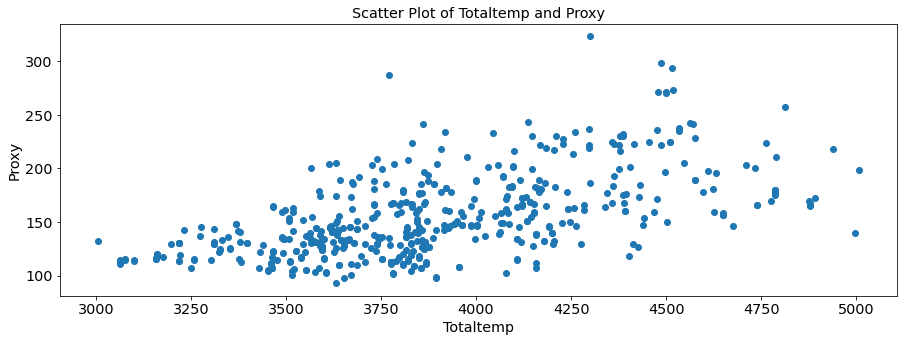

In [ ]:
dataset['Totaltemp'] = dataset['Totaltemp'].astype(int)  # Convert "Totaltemp" to integers

# Plotting the scatter plot
plt.scatter(dataset['Totaltemp'], dataset['Proxy'])

# Adding labels and title
plt.xlabel('Totaltemp')
plt.ylabel('Proxy')
plt.title('Scatter Plot of Totaltemp and Proxy')

# Display the plot
plt.show()

In [ ]:
df_sw_fw=pd.read_csv("sw_locus_fw_locus_population_with_counts (3).csv") #in data folder looks like sw_locus_fw_locus_population_with_counts.csv

In [ ]:
df_sw_fw

,to_locus_id,to_fish_group_id,transfer_date,from_locus_population_id,from_count_stocking,from_locus_id,from_year_class,from_avg_weight,from_fish_group_id
0,3046025,520,2008-03-20,36705857,77196,3047424,2007,109,1189
1,3046036,80,2015-01-30,36760186,47054,3051294,2014,116,153
2,3046036,11,2017-01-03,36774243,45121,3049067,2016,113,671
3,3046036,1052,2019-01-15,36789742,22090,3050198,2018,134,948
4,3046036,1052,2019-01-15,36789724,24410,3047918,2018,123,948
...,...,...,...,...,...,...,...,...,...
8404,7189886,6215,2023-04-10,194655920,3212,7185841,2022,418,6133
8405,7189886,6215,2023-04-10,194741287,6207,7185841,2022,418,6133
8406,7189886,6215,2023-04-10,194741271,6355,7185841,2022,418,6133
8407,7189886,6215,2023-05-18,194741280,3189,7185840,2022,362,6133


In [ ]:
joined_sw_fw = pd.merge(joined, df_sw_fw, left_on=['pretransfer_fw_locus_population_id'], right_on=['from_locus_population_id'], how='left')


In [ ]:
joined_sw_fw

,pretransfer_fw_locus_population_id,pretransfer_fw_locus_id,first_movement_date,first_feeding_date,shipout_date_x,days_in_fresh_water,average_tempr,median_tempr,average_tempr_14_bfr_ship,strain,...,Totaltemp,to_locus_id,to_fish_group_id,transfer_date,from_locus_population_id,from_count_stocking,from_locus_id,from_year_class,from_avg_weight,from_fish_group_id
0,36687326,3048734,2006-11-26,2006-11-27,2007-04-13,138.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36687382,3046776,2006-11-26,2006-11-27,2007-03-28,122.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36687957,3046922,2006-11-26,2006-11-27,2007-04-11,136.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36688302,3050804,2006-11-26,2006-11-27,2007-04-19,144.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36688439,3047106,2006-11-26,2006-11-27,2007-04-23,148.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,194650512,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,...,4422.0,3051003.0,6179.0,2023-02-28,194650512.0,4807.0,3046268.0,2022.0,255.0,6150.0
5550,194650513,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,...,4422.0,3051003.0,6179.0,2023-02-28,194650513.0,5138.0,3046268.0,2022.0,255.0,6150.0
5551,194650515,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,...,4422.0,3051003.0,6179.0,2023-02-28,194650515.0,7786.0,3046268.0,2022.0,255.0,6150.0
5552,194650516,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,...,4422.0,3051003.0,6179.0,2023-02-28,194650516.0,4902.0,3046268.0,2022.0,255.0,6150.0


In [ ]:
joined_sw_fw.columns

Index(['pretransfer_fw_locus_population_id', 'pretransfer_fw_locus_id',
       'first_movement_date', 'first_feeding_date', 'shipout_date_x',
       'days_in_fresh_water', 'average_tempr', 'median_tempr',
       'average_tempr_14_bfr_ship', 'strain', 'season',
       'final_locus_population_id', 'shipout_date_y', 'Totaltemp',
       'to_locus_id', 'to_fish_group_id', 'transfer_date',
       'from_locus_population_id', 'from_count_stocking', 'from_locus_id',
       'from_year_class', 'from_avg_weight', 'from_fish_group_id'],
      dtype='object')

In [ ]:
joined_sw_fw.drop(['from_fish_group_id'], axis='columns', inplace=True)
joined_sw_fw.drop(['from_locus_id'], axis='columns', inplace=True)
joined_sw_fw.drop(['from_locus_population_id'], axis='columns', inplace=True)


In [ ]:
joined_sw_fw

,pretransfer_fw_locus_population_id,pretransfer_fw_locus_id,first_movement_date,first_feeding_date,shipout_date_x,days_in_fresh_water,average_tempr,median_tempr,average_tempr_14_bfr_ship,strain,season,final_locus_population_id,shipout_date_y,Totaltemp,to_locus_id,to_fish_group_id,transfer_date,from_count_stocking,from_year_class,from_avg_weight
0,36687326,3048734,2006-11-26,2006-11-27,2007-04-13,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36687382,3046776,2006-11-26,2006-11-27,2007-03-28,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36687957,3046922,2006-11-26,2006-11-27,2007-04-11,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36688302,3050804,2006-11-26,2006-11-27,2007-04-19,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36688439,3047106,2006-11-26,2006-11-27,2007-04-23,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,194650512,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,NaN,194650512.0,01.03.2023,4422.0,3051003.0,6179.0,2023-02-28,4807.0,2022.0,255.0
5550,194650513,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,NaN,194650513.0,01.03.2023,4422.0,3051003.0,6179.0,2023-02-28,5138.0,2022.0,255.0
5551,194650515,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,NaN,194650515.0,01.03.2023,4422.0,3051003.0,6179.0,2023-02-28,7786.0,2022.0,255.0
5552,194650516,3046268,2021-11-04,2022-04-12,2023-03-01,482.0,13.649464,13.897259,14.125,NaN,NaN,194650516.0,01.03.2023,4422.0,3051003.0,6179.0,2023-02-28,4902.0,2022.0,255.0


In [1]:
weighted_data = joined_sw_fw.groupby(['to_locus_id', 'to_fish_group_id']).agg({
    'days_in_fresh_water': lambda x: np.average(x, weights=joined_sw_fw.loc[x.index, 'from_count_stocking']),
    'average_tempr': lambda x: np.average(x, weights=joined_sw_fw.loc[x.index, 'from_count_stocking']),
    'median_tempr': lambda x: np.average(x, weights=joined_sw_fw.loc[x.index, 'from_count_stocking']),
    'average_tempr_14_bfr_ship': lambda x: np.average(x, weights=joined_sw_fw.loc[x.index, 'from_count_stocking']),
    'Totaltemp': lambda x: np.average(x, weights=joined_sw_fw.loc[x.index, 'from_count_stocking'])
})

sw_agg = pd.DataFrame(weighted_data).reset_index()



sw_agg.head()





NameError: ignored